1. Importing libraries
2. Importing dataframes
3. Creating figures: bar, histogram, scatter plot, line
4. Histogram orders_hour_of_day
5. Bar chart: orders per loyalty group
6. Line chart: spending (in prices) per hour_of_day
7. Exploratory analysis
8. Exporting figures
9. Exporting pickle file
10. Additional Visualizations for Final Submission 4.10

1. Import libraries

In [3]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

2. Importing dataframes

In [5]:
path = r'C:/Users/Alejandra/Documents/CF/Data Immersion/Achievement 4/06022025_Instacart Basket Analysis'

In [6]:
#Loading pickle files
df = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared Data', 'orders_products_customers_final.pkl'))

In [7]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order_clean,product_id,product_name,department_id,prices,...,user_frequency_median,user_frequency,gender,state,age,date_joined,dependants,family_status,income,_merge
0,2539329,1,1,2,8,0.0,196,Soda,7,9.0,...,20.5,non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,0.0,14084,Organic Unsweetened Vanilla Almond Milk,16,12.5,...,20.5,non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,0.0,12427,Original Beef Jerky,19,4.4,...,20.5,non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,0.0,26088,Aged White Cheddar Popcorn,19,4.7,...,20.5,non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,0.0,26405,XL Pick-A-Size Paper Towel Rolls,17,1.0,...,20.5,non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both


3. Creating figures: bar, histogram, scatter plot, line

In [9]:
#Bar chart

<Axes: xlabel='order_day_of_week'>

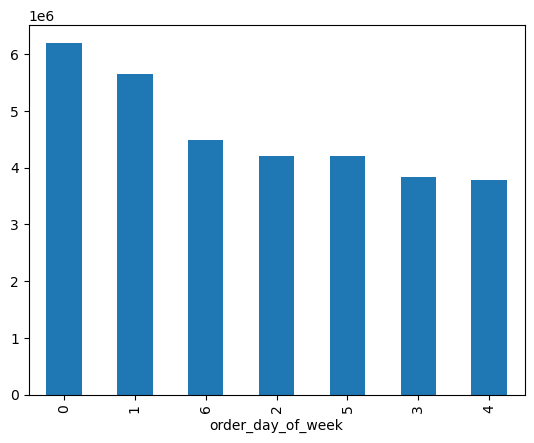

In [10]:
df['order_day_of_week'].value_counts().plot.bar()

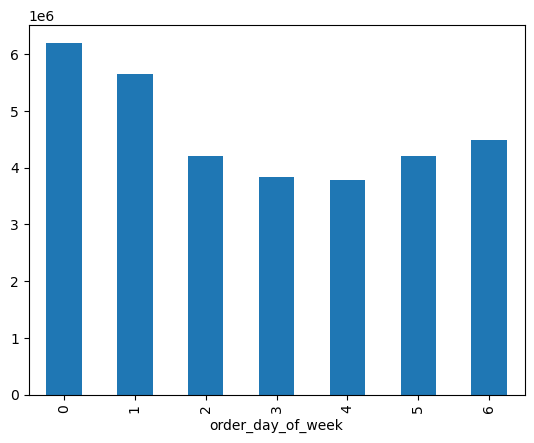

In [39]:
busiest_day = df['order_day_of_week'].value_counts().sort_index().plot.bar()

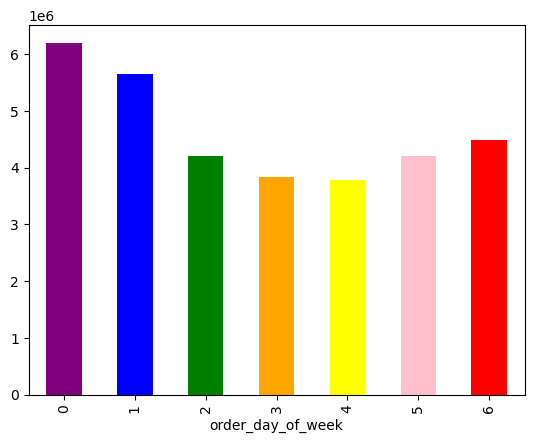

In [12]:
bar = df['order_day_of_week'].value_counts().sort_index().plot.bar(color =['purple','blue','green','orange','yellow','pink','red'])


In [13]:
#Exporting figure
bar.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'bar_orders_dow4.9.png'))


<Axes: xlabel='prices', ylabel='prices'>

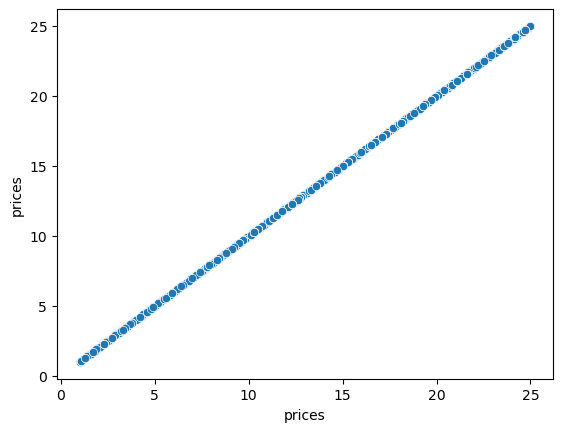

In [14]:
#Scatter plot
sns.scatterplot(x = 'prices', y = 'prices',data = df)

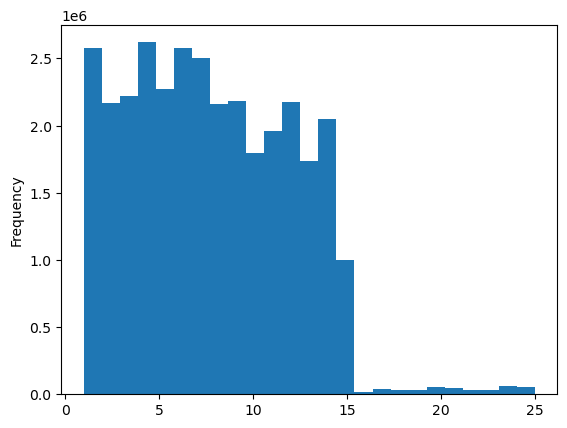

In [41]:
#Histograms
price_histogram=df['prices'].plot.hist(bins=25)

In [83]:
#Line chart
#Creating random sample
np.random.seed(4)
dev=np.random.rand(len(df)) <=0.7

In [85]:
#Splitting dataframe into two samples
big = df[dev]
small = df[~dev]

In [87]:
#Checking operation
len(df)

32404859

In [89]:
len(big)+len(small)

32404859

In [91]:
#Operation successful

In [93]:
#Reducing subset to needed columns only in 'small' sample
df_2 = small[['order_day_of_week','prices']]

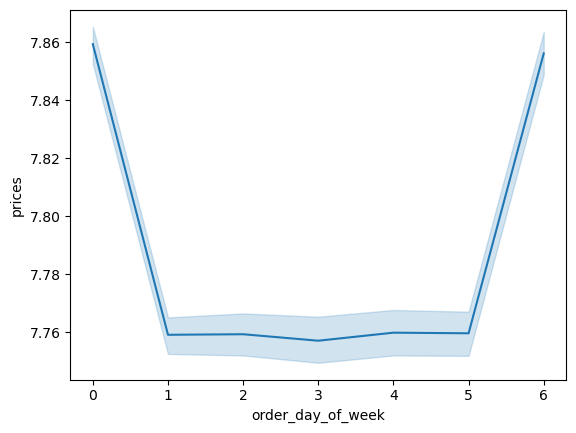

In [95]:
#Plotting line chart
line_1=sns.lineplot(data=df_2,x='order_day_of_week',y='prices')

4. Histogram orders_hour_of_day 

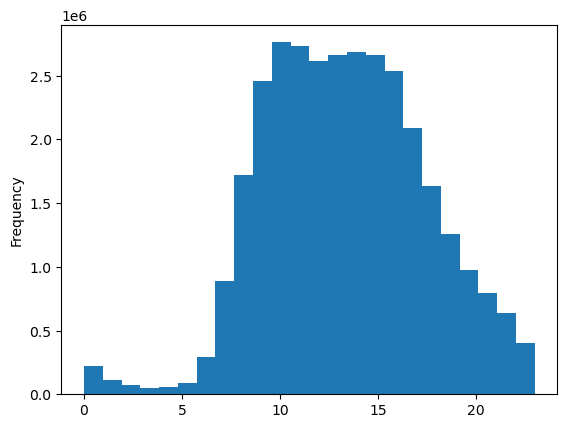

In [113]:
dow_histogram = df['order_hour_of_day'].plot.hist(bins=24)

Description

What this histogram is showing is that there is either none or missing information for the 11th hour of the day (as ratified on the value count below). 
Due to the distribution of the data, it's visible that there are more orders around the middle of the day; where the data is missing. It is safe to assume that this data is indeed missing, instead of it simply not existing. Furthermore, the distribution of the data hints at what possible measures can be taken to treat this missing data: In the event it is also missing at the source and after confirming the visible trend by means of a T-test, it could be interpolated. 

In [111]:
df['order_hour_of_day'].value_counts(dropna=False)

order_hour_of_day
10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: count, dtype: int64

5. Bar chart: orders per loyalty group

In [ ]:
# Group by 'loyalty_flag', calculate mean of 'max_order'
bar_loyaltygroup=df.groupby('loyalty_flag')['max_order'].sum().sort_index()
# Define colors for category
color_map={'Loyal customer': 'purple', 'New customer': 'blue', 'Regular customer': 'green'}
# Plot bar chart with colors
loyalty_maxord=bar_loyaltygroup.plot.bar(color=[color_map[label] for label in bar_loyaltygroup.index])

Description

This bar chart shows the average of maximum orders per customer loyalty group. It shows that indeed, on average, the maximum number of orders are placed by the most loyal customers. However, in the following chart, we see that despite contributing the highest maximum orders, it is the new customers who have the mean highest spending average, as the second chart presents the mean of average spending per category. 

In [ ]:
# Group by 'loyalty_flag', calculate mean of 'spending_avg'
bar_loyaltygroup2= df.groupby('loyalty_flag')['spending_avg'].mean().sort_index()
# Define colors for category
color_map = {'Loyal customer': 'purple', 'New customer': 'blue', 'Regular customer': 'green'}
# Plot bar chart with colors
loyalty_avg_spending=bar_loyaltygroup2.plot.bar(color=[color_map[label] for label in bar_loyaltygroup.index])

6. Line chart: spending (in prices) per hour_of_day

In [ ]:
#Creating random sample
np.random.seed(4)
dev=np.random.rand(len(df)) <=0.7

In [ ]:
#Splitting dataframe into two samples
big_spending = df[dev]
small_spending = df[~dev]

In [ ]:
#Checking operation
len(df)

In [ ]:
len(big_spending)+len(small_spending)

In [ ]:
#Reducing subset to needed columns only in 'small' sample
small_spending_sample = small_spending[['order_hour_of_day','prices']]

In [ ]:
#Plotting line chart
line_spending_hod=sns.lineplot(data=small_spending_sample,x='order_hour_of_day',y='prices')

7. Exploratory analysis

Age and family situation of customers

In [ ]:
#Creating random sample
np.random.seed(4)
dev=np.random.rand(len(df)) <=0.7

In [ ]:
#Splitting dataframe into two samples
big_customer_sample = df[dev]
small_customer_sample = df[~dev]

In [ ]:
#Checking operation
len(df)

In [ ]:
len(big_spending)+len(small_spending)

In [ ]:
#Reducing subset to needed columns only in 'small' sample
small_customer_subset = small_customer_sample[['age','dependants']]

In [ ]:
#Plotting line chart
line_age_family=sns.lineplot(data=small_customer_subset,x='age',y='dependants')

Description

This chart shows that there is no visible correlation between age and number of dependants. However, it is visible that the number of dependants ranges somewhere between 1.40 and and 2. This data may be better interpreted with a box and whiskers or integrated further variables like family_status (married/single). 

Spending power profile

In [ ]:
#Scatter plot 
spending_power_profile=sns.scatterplot(x = 'age', y = 'income',data = df)

Description

This scatter plot shows that a sizable part of the consumer population earns 200,000 or less. To the naked eye, there is a faintly visible upwards trend: The older the customer, the more purchasing power. The purchasing power seems to increment 50% after age 40-- from 200k to 300k in spending power. 

8. Exporting figures

In [ ]:
dow_hist.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'dow_histogram.png'))

In [208]:
loyalty_maxord.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'loyaltygroup_maxord.png'))

In [210]:
loyalty_avg_spending.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'loyaltygroup_avgspending.png'))

In [198]:
line_spending_hod.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'spending_hod.png'))

In [200]:
line_age_family.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'age_family.png'))

In [202]:
spending_power_profile.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'spending_profile.png'))

9. Exporting pickle file


In [215]:
df.to_pickle(os.path.join(path, '02_Data','Prepared Data', 'orders_products_customers_final.pkl'))

10. Additional Visualizations for Final Submission 4.10

Missing: 
-Busiest hours of the day (in hours)
-Most profitable time of the day (hours vs price)
-Price ranges (frequency of category)
-Product popularity (order frequency per department)

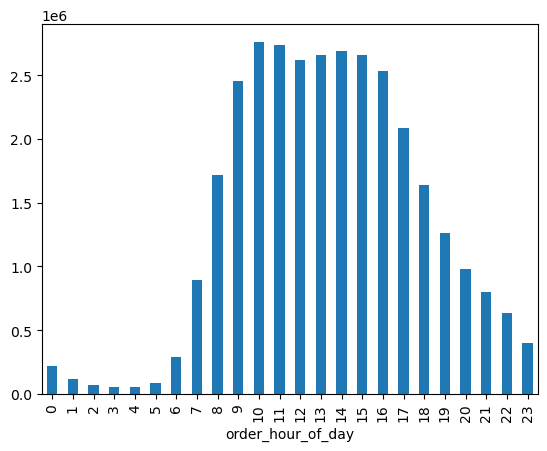

In [43]:
busiest_hours = df['order_hour_of_day'].value_counts().sort_index().plot.bar()

In [119]:
#Creating random sample
np.random.seed(4)
dev=np.random.rand(len(df)) <=0.7

In [121]:
#Splitting dataframe into two samples
big = df[dev]
small = df[~dev]

In [75]:
#Checking operation
len(df)

32404859

In [77]:
len(big)+len(small)

32404859

In [115]:
#Reducing subset to needed columns only in 'small' sample
df_3 = small[['order_hour_of_day','prices']]

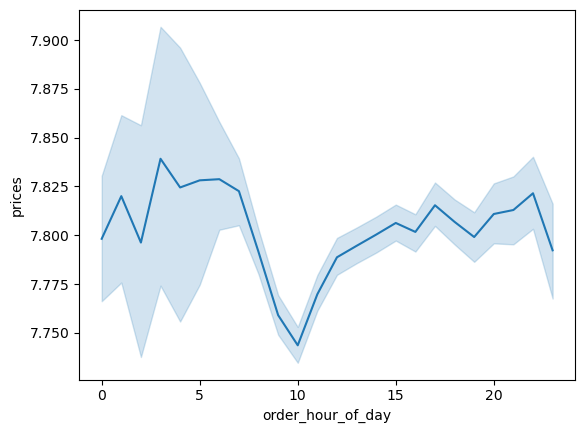

In [123]:
#Plotting line chart
hod_prices=sns.lineplot(data=df_3,x='order_hour_of_day',y='prices')

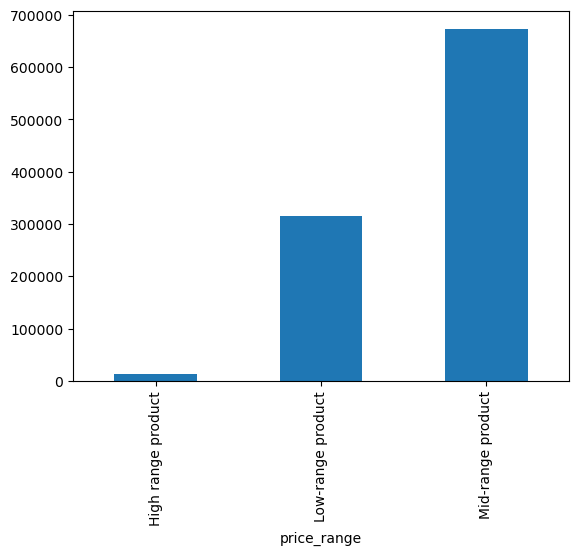

In [135]:
price_range_freq = df['price_range'].value_counts().sort_index().plot.bar()

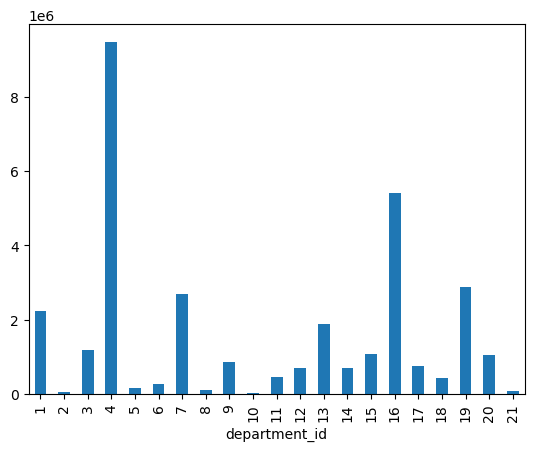

In [137]:
department_freq = df['department_id'].value_counts().sort_index().plot.bar()

In [139]:
#Exporting visualizations

In [155]:
busiest_hours.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'For Delivery', 'Busiest Hours.png'))

In [149]:
hod_prices.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'For Delivery', 'Hour-of-Day Prices Frequency.png'))

In [151]:
price_range_freq.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'For Delivery', 'Order Frequency by Price Ranges.png'))

In [153]:
department_freq.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'For Delivery', 'Order Frequency by Department.png'))

In [157]:
busiest_day.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'For Delivery', 'Busiest Days.png'))